In [20]:
import cv2
import os
from pathlib import Path
from matplotlib import pyplot as plt
import math

In [23]:
#
path = Path("Dataset_TP3")
videos_paths = [p for p in path.iterdir() if p.is_file()]

videos = {}
for file in videos_paths:
    vid = cv2.VideoCapture(file)
    if not vid.isOpened():
        print("Error: Could not open video.")
        continue
    videos[file] = vid

In [24]:
# Histogramme
frame_number = 0
histograms = {}
for vid in videos:
    histograms_frame = []
    video_file = videos[vid]
    print(f"Computing histograms for {vid}")
    while True:
        ret, frame = video_file.read()
        if not ret:
            break

        frame_number += 1
        b, g, r = cv2.split(frame)

        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

        hist = []
        hist.append(hist_r)
        hist.append(hist_g)
        hist.append(hist_b)
        histograms_frame.append(hist)
    histograms[vid] = histograms_frame
    print(f"Computed {len(histograms_frame)} frames")

Computing histograms for Dataset_TP3/combat_cuts.mp4
Computed 5047 frames
Computing histograms for Dataset_TP3/drone_mouvement_canyon.mp4
Computed 2015 frames
Computing histograms for Dataset_TP3/fondu_enchaine_gony.mp4
Computed 1389 frames
Computing histograms for Dataset_TP3/tennis_plan_fixe.mp4
Computed 18278 frames


In [25]:
def compute_euclidean_distance(hist_a, hist_b, n: int) -> float:
    distance = 0.0
    for i in range(n):
        distance += (hist_a[i] - hist_a[i+2]) ** 2
    return math.sqrt(distance)

/tmp/ipykernel_599659/2092104872.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(distance)


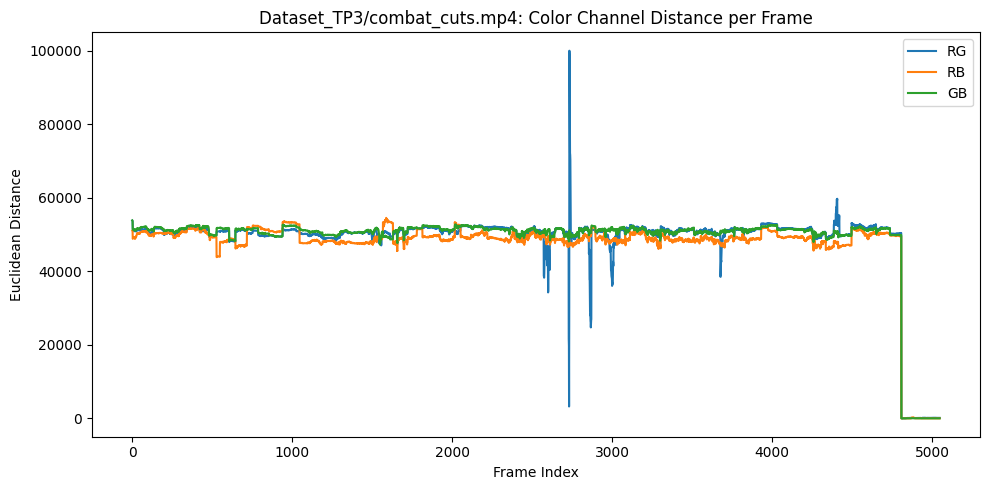

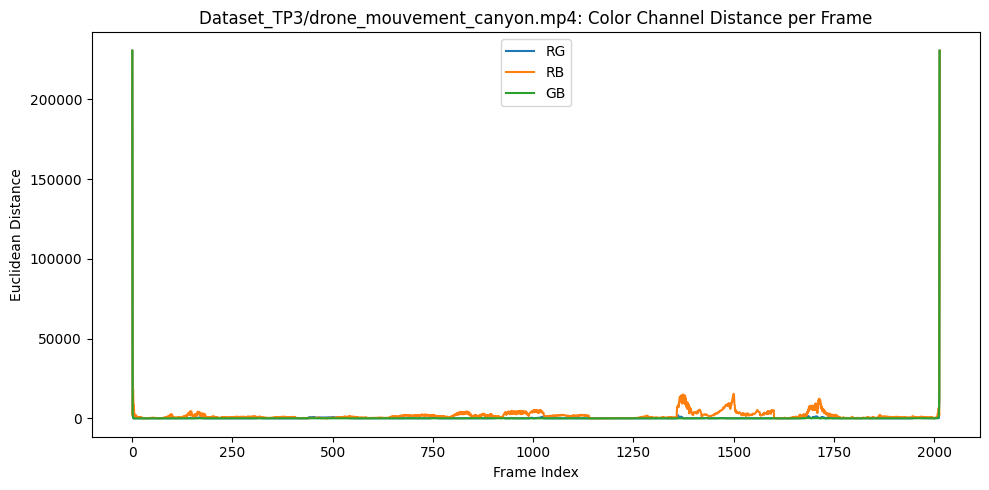

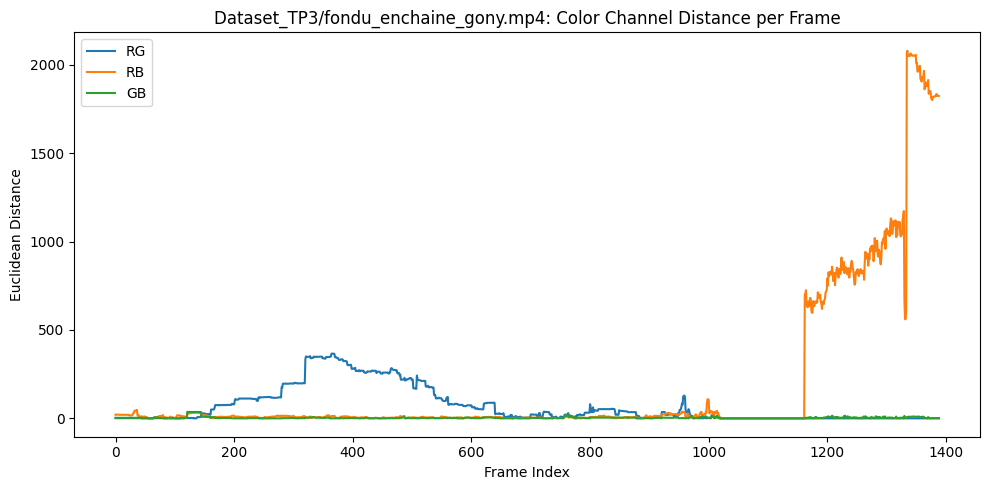

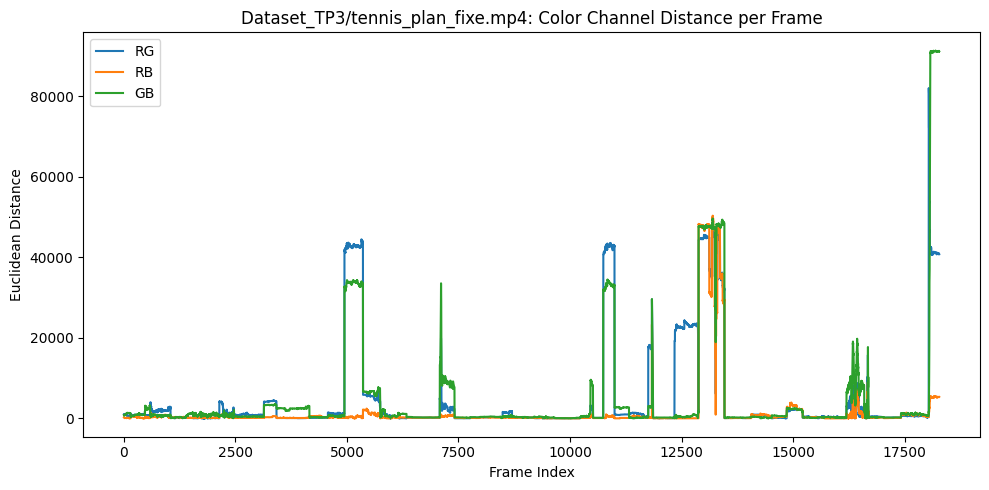

In [28]:
N = 1
for histo in histograms:
    frames = histograms[histo]
    distance_rg = []
    distance_rb = []
    distance_gb = []
    for frame in frames:
        r, g, b = frame
        distance_rg.append(compute_euclidean_distance(r, r, N))
        distance_rb.append(compute_euclidean_distance(b,b, N))
        distance_gb.append(compute_euclidean_distance(g, g, N))

    plt.figure(figsize=(10, 5))
    plt.plot(distance_rg, label="RG")
    plt.plot(distance_rb, label="RB")
    plt.plot(distance_gb, label="GB")

    plt.xlabel("Frame Index")
    plt.ylabel("Euclidean Distance")
    plt.title(f"{histo}: Color Channel Distance per Frame")
    plt.legend()
    plt.tight_layout()
    plt.show()
    